이번 장에서는 신경망 학습의 핵심 개념들을 만난다. 이번 장에서 다룰 주제는 가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼파라미터 설정 방법 등 모두가 신경망 학습에서 중요한 주제이다. 오버피팅의 대응책인 가중치 감소와 드롭아웃 등의 정규화 방법도 간략히 설명하고 구현해본다. 

# 6.1 매개변수 갱신
신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 **최적화(Optimization)**라 한다. <br><br>
우리는 지금까지 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)를 이용했다. 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가갔다. 이것이 **확률적 경사 하강법(SGD)**이란 단순한 방법인데, 매개변수 공간을 무작정 찾는 것보다 '똑똑한' 방법이다. 지금부터 SGD의 단점을 알아본 후 SGD와는 다른 최적화 기법을 소개한다.

## 6.1.1 모험가 이야기
모험가는 주위 경치는 볼 수 없지만 서있는 땅의 기울기는 알 수 있다. 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가자는 것이 SGD의 전략이다.

## 6.1.2 확률적 경사 하강법(SGD)
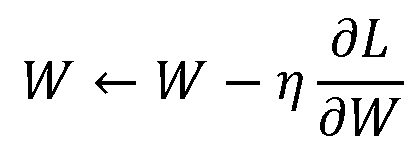

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]  # 각각 가중치 매개변수와 기울기를 저장

## 6.1.3 SGD의 단점
SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다. SGD의 단점을 알아보고자 다음 함수의 최솟값을 구하는 문제를 생각해본다.<br><br>
$$ f(x,y) = \frac{1}{20}x^2 + y^2 $$  


탐색을 시작하는 장소(초깃값)는 (x, y) = (-7.0, 2.0)으로 하여 SGD를 적용해본다. 결과는 다음과 같다.<br><br>
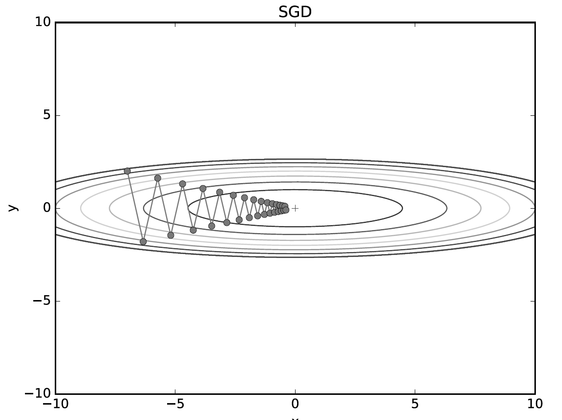

SGD는 위의 그림과 같이 심하게 굽이진 움직임을 보여준다. 상당히 비효율적인 움직임이다. 즉, SGD의 단점은 **비등방성 함수**(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이라는 것이다. 또한, SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해볼 필요가 있다.  
이제부터 SGD의 이러한 단점을 개선해주는 **모멘텀, AdaGrad, Adam**이라는 세 방법을 소개할 것이다.

## 6.1.4 모멘텀
**모멘틈 (Momentum)**은 '운동량'을 뜻하는 단어로, 물리와 관계가 있다. 모멘텀 기법은 수식으로는 다음과 같이 쓸 수 있다.<br><br>
$$ v = \alpha v - \eta \frac{\alpha L}{\alpha W} $$<br><br>
$$ W = W + v $$<br>